**Step 1:** Environment setup


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set(style="whitegrid", palette="deep")

**Step 2**: Create synthetic dataset with unit_price

In [14]:

import pandas as pd
import numpy as np

np.random.seed(42)

categories = {
    "Electronics": ["Laptop", "Smartphone", "Monitor", "Printer", "Router"],
    "Furniture": ["Office Chair", "Desk", "Bookshelf", "Cabinet", "Sofa"],
    "Stationery": ["Notebook", "Pen Pack", "File Folder", "Stapler", "Marker Set"],
    "Appliances": ["Microwave", "Refrigerator", "Mixer Grinder", "Air Purifier", "Water Heater"],
    "Fashion": ["T-Shirt", "Jeans", "Sneakers", "Jacket", "Backpack"]
}
regions = ["North", "South", "East", "West"]

n = 120
dates = pd.date_range("2025-10-01", "2026-01-15", freq="D")
chosen_dates = pd.to_datetime(np.random.choice(dates, size=n))

data = []
for i in range(n):
    cat = np.random.choice(list(categories.keys()))
    prod = np.random.choice(categories[cat])
    qty = np.random.randint(1, 11)
    base_price = {
        "Electronics": np.random.randint(15000, 60000),
        "Furniture": np.random.randint(5000, 25000),
        "Stationery": np.random.randint(20, 500),
        "Appliances": np.random.randint(3000, 20000),
        "Fashion": np.random.randint(300, 3000)
    }[cat]
    unit_price = round(base_price * np.random.uniform(0.85, 1.15), 2)
    region = np.random.choice(regions)
    data.append({
        "order_id": f"ORD{str(i+1).zfill(4)}",
        "order_date": chosen_dates[i].strftime("%Y-%m-%d"),
        "product": prod,
        "category": cat,
        "quantity": qty,
        "unit_price": unit_price,
        "total_amount": round(qty * unit_price, 2),
        "customer_region": region
    })

df = pd.DataFrame(data)
df.head()

,order_id,order_date,product,category,quantity,unit_price,total_amount,customer_region
0,ORD0001,2026-01-11,Mixer Grinder,Appliances,3,"17,669.53","53,008.59",South
1,ORD0002,2025-11-21,Printer,Electronics,7,"24,556.38","171,894.66",West
2,ORD0003,2026-01-01,File Folder,Stationery,1,485.21,485.21,South
3,ORD0004,2025-10-15,Notebook,Stationery,10,206.10,"2,061.00",West
4,ORD0005,2026-01-15,Jacket,Fashion,5,771.66,"3,858.30",West


 **Step 3:** Validate revenue calculation

In [17]:

df["total_amount"] = df["quantity"] * df["unit_price"]

# Basic checks
assert df["quantity"].min() > 0
assert df["unit_price"].min() > 0
assert df["total_amount"].isna().sum() == 0

df.describe(include="all")

,order_id,order_date,product,category,quantity,unit_price,total_amount,customer_region
count,120,120,120,120,120.00,120.00,120.00,120
unique,120,72,25,5,NaN,NaN,NaN,4
top,ORD0001,2025-12-01,Stapler,Appliances,NaN,NaN,NaN,East
freq,1,5,8,30,NaN,NaN,NaN,33
mean,NaN,NaN,NaN,NaN,5.28,"13,188.78","65,413.19",NaN
std,NaN,NaN,NaN,NaN,2.81,"15,426.05","86,555.34",NaN
min,NaN,NaN,NaN,NaN,1.00,30.94,30.94,NaN
25%,NaN,NaN,NaN,NaN,3.00,491.14,"2,820.05",NaN
50%,NaN,NaN,NaN,NaN,5.00,"10,421.84","33,675.65",NaN
75%,NaN,NaN,NaN,NaN,7.00,"17,949.74","93,458.87",NaN


 **Step 4:** Overall metrics

In [18]:

total_revenue = df["total_amount"].sum()
total_orders = df["order_id"].nunique()
total_qty = df["quantity"].sum()
aov = total_revenue / total_orders

overall_summary = {
    "Total revenue": f"₹{total_revenue:,.2f}",
    "Total orders": total_orders,
    "Total quantity sold": total_qty,
    "Average order value (AOV)": f"₹{aov:,.2f}"
}
overall_summary

{'Total revenue': '₹7,849,582.40',
 'Total orders': 120,
 'Total quantity sold': np.int64(633),
 'Average order value (AOV)': '₹65,413.19'}

 **Step 5**: Product-wise performance & Category-wise performance

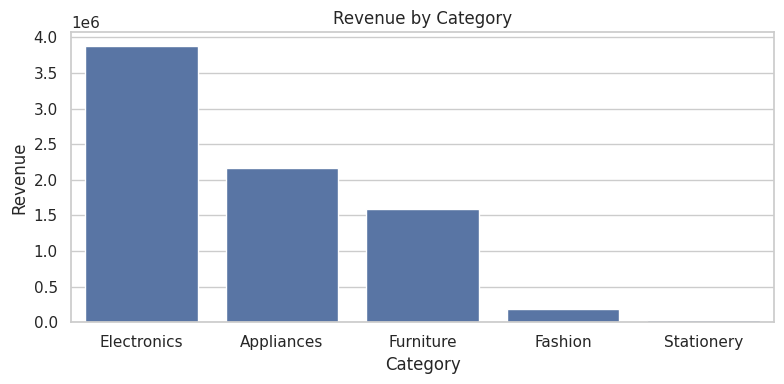

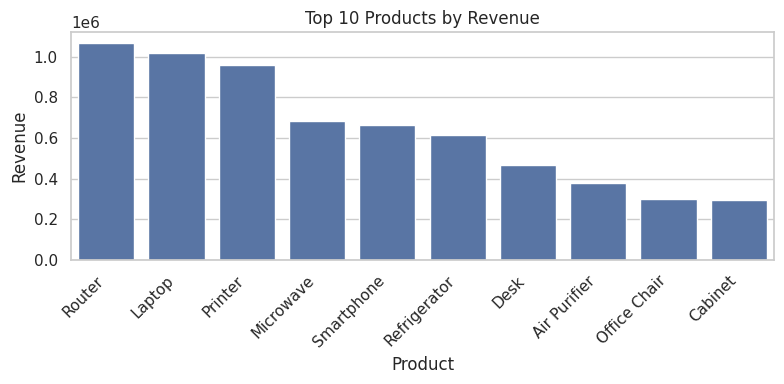

In [19]:

product_perf = (
    df.groupby("product")
      .agg(revenue=("total_amount", "sum"),
           orders=("order_id", "nunique"),
           qty=("quantity", "sum"),
           avg_price=("unit_price", "mean"))
      .sort_values("revenue", ascending=False)
)
product_perf.head(10)


category_perf = (
    df.groupby("category")
      .agg(revenue=("total_amount", "sum"),
           orders=("order_id", "nunique"),
           qty=("quantity", "sum"),
           avg_price=("unit_price", "mean"))
      .sort_values("revenue", ascending=False)
)
category_perf

# Optional visuals
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(x=category_perf.index, y=category_perf["revenue"])
plt.title("Revenue by Category")
plt.xlabel("Category"); plt.ylabel("Revenue")
plt.tight_layout(); plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x=product_perf.head(10).index, y=product_perf.head(10)["revenue"])
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product"); plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()

**Step 6**: Monthly analysis

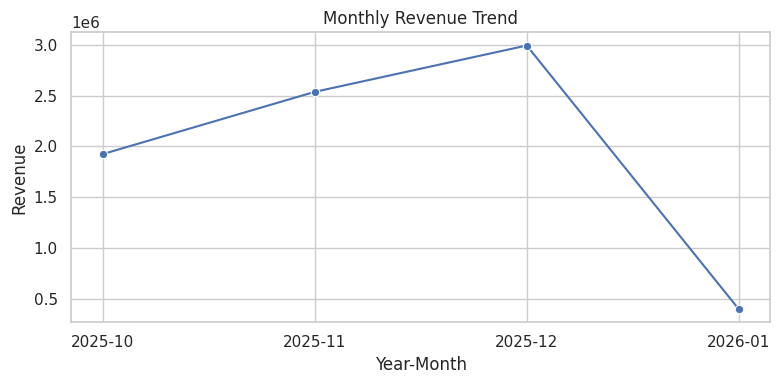

In [20]:

df["order_date"] = pd.to_datetime(df["order_date"])
df["year_month"] = df["order_date"].dt.to_period("M").astype(str)

monthly_perf = (
    df.groupby("year_month")
      .agg(revenue=("total_amount", "sum"),
           orders=("order_id", "nunique"),
           qty=("quantity", "sum"))
      .sort_index()
)
monthly_perf

# Visual: Monthly revenue trend
plt.figure(figsize=(8,4))
sns.lineplot(x=monthly_perf.index, y=monthly_perf["revenue"], marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Year-Month"); plt.ylabel("Revenue")
plt.tight_layout(); plt.show()

**Step 7:** Business summary

In [10]:

top_cat = df.groupby("category")["total_amount"].sum().idxmax()
top_cat_rev = df.groupby("category")["total_amount"].sum().max()

top_prod = df.groupby("product")["total_amount"].sum().idxmax()
top_prod_rev = df.groupby("product")["total_amount"].sum().max()

monthly_rev = df.copy()
monthly_rev["order_date"] = pd.to_datetime(monthly_rev["order_date"])
monthly_rev["year_month"] = monthly_rev["order_date"].dt.to_period("M").astype(str)
best_month = monthly_rev.groupby("year_month")["total_amount"].sum().idxmax()
best_month_rev = monthly_rev.groupby("year_month")["total_amount"].sum().max()

summary = f"""
📊 Business Summary:
- Total revenue: ₹{df['total_amount'].sum():,.2f} across {df['order_id'].nunique()} orders.
- Top category: {top_cat} with ₹{top_cat_rev:,.2f} revenue.
- Top product: {top_prod} with ₹{top_prod_rev:,.2f} revenue.
- Best month: {best_month} with ₹{best_month_rev:,.2f} revenue.
- Recommendation: Focus on {top_cat} category and promote {top_prod} during peak months. Consider bundling low-performing items or offering regional discounts.
"""
print(summary)


📊 Business Summary:
- Total revenue: ₹961,085.59 across 100 orders.
- Top category: Electronics with ₹381,540.41 revenue.
- Top product: Power Bank with ₹105,792.31 revenue.
- Best month: 2026-01 with ₹336,143.25 revenue.
- Recommendation: Focus on Electronics category and promote Power Bank during peak months. Consider bundling low-performing items or offering regional discounts.



**Step 8:** Clean export for spreadsheet display

In [24]:


# Format order_date as string to avoid ########## in Excel
df["order_date"] = pd.to_datetime(df["order_date"]).dt.strftime("%Y-%m-%d")

# Rename columns for clarity
df_export = df.rename(columns={
    "order_id": "Order ID",
    "order_date": "Order Date",
    "product": "Product Name",
    "category": "Category",
    "quantity": "Quantity",
    "unit_price": "Unit Price",
    "total_amount": "Total Amount",
    "customer_region": "Region"
})

# Optional: round currency columns
df_export["Unit Price"] = df_export["Unit Price"].round(2)
df_export["Total Amount"] = df_export["Total Amount"].round(2)

# Export to CSV
df_export.to_csv("week2_sales_analysis_output.csv", index=False)
print("✅ Exported clean CSV: week2_sales_analysis_output.csv")

✅ Exported clean CSV: week2_sales_analysis_output.csv


In [16]:
print(df.columns)

Index(['order_id', 'order_date', 'product', 'category', 'quantity',
       'unit_price', 'total_amount', 'customer_region'],
      dtype='object')
